# Evaluation terminale : Machine learning & python -- YOUSFI Younes

Cet examen se compose de 3 parties : 
<ol>
  <li>Restitution théorique</li>
  <li>Restitution pratique</li>
  <li>Cas pratique</li>
</ol>

## Partie 1 : Restitution théorique

Pour cette partie, l'objectif est de décrire des notions théoriques. Essayez de rédiger des réponses claires en utilisant vos mots.

#### Question 1.1: Donner une définition du machine learning. Eviter de recopier de wikipédia, essayer d'en donner une description en quelques mots.

Le Machine Learning est une technologie d’intelligence artificielle permettant aux ordinateurs d’apprendre sans avoir été programmés explicitement à cet effet. Les ordinateurs ont besoin de données sur lesquelles s’entraîner. 

#### Question 1.2: Donner quelques applications concrètes d'utilisation du machine learning.

La recommandation de programmes sur une plateforme de streaming. La reconnaissance de panneau de signalisation par des véhicules autonomes. Des prévisions météo...

#### Question 1.3: Quelles sont les 2 principales familles "d'apprentissage"? Donner une rapide définition de chacune

L'apprentissage supervisé est une tâche d'apprentissage automatique consistant à apprendre une fonction de prédiction à partir d'exemples annotés.
L'apprentissage non supervisé désigne la situation d'apprentissage automatique où les données ne sont pas étiquetées.

#### Question 1.4: Dans laquelle de ces familles appartient la "classification"? Le "clustering"?

Classification ---> supervisé.
Clustering ----> non-supervisé.

#### Question 1.5: Définissez ce qu'est un arbre de décision et décrivez  de manière simple sa construction.

Un arbre de décision est un outil d'aide à la décision représentant un ensemble de choix sous la forme graphique d'un arbre. Les différentes décisions possibles sont situées aux extrémités des branches, et sont atteintes en fonction de décisions prises à chaque étape.

#### Question 1.6: Dans quelle situation parle-t-on "d'overfitting"?

En statistique, le surapprentissage, ou sur-ajustement, ou encore surinterprétation, est une analyse statistique qui correspond trop précisément à une collection particulière d'un ensemble de données.

## Partie 2 : Etude d'un cas pratique

Pour cette partie, vous devrez vous inspirer des TP réalisés en cours. 

Il vous faut importer les librairies qui vous seront nécessaires répondre à la problèmatique dans la cellule suivante :

In [47]:
# packages
import pandas as pd
#...
# from pandas_profiling import ProfileReport
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


Importez les données comme suit :

In [59]:
data = pd.read_csv('nba_logreg.csv')

Ce jeu de données décrit les caracteristiques de jeu de joueurs de Basketball au sein de la NBA. La variable d'intérêt Y est "TARGET_5yrs". La description de ce dataset se trouve dans le fichier "NBA_variables_doc.png"

__L'objectif du problème est de réussir à prédire si un jeune joueur durera plus ou moins que 5ans au sein de la ligue.__

In [60]:
data

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


#### Question 2.1: Donnez au moins une colonne qui doit être enlevé du jeu de données. Pourquoi? 

Name ne sert pas à grand chose pour améliorer notre modèle.

#### Exercice 2.1: Enlevez les variables du dataset qui vous semble inutile au problème.

In [61]:
data = data.drop(columns=["Name","3P Made", "3PA"])
    
data

,GP,MIN,PTS,FGM,FGA,FG%,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,68,12.6,3.9,1.5,4.1,35.8,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,52,12.0,4.5,1.7,3.8,43.9,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


#### Question 2.2: Ce dataset contient - il des données manquantes ou non exploitable?

oui

#### Exercice 2.2: Si oui, donnez en la proportion par colonne.

In [62]:
data.isnull().sum()

GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [63]:
data.dropna(inplace=True)

In [68]:
data = data.drop(columns=["OREB","DREB"])
    
data

,GP,MIN,PTS,FGM,FGA,FG%,3P%,FTM,FTA,FT%,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,25.0,1.6,2.3,69.9,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,23.5,2.6,3.4,76.5,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,24.4,0.9,1.3,67.0,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,22.6,0.9,1.3,68.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,1.3,1.9,67.4,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,14.3,1.2,1.5,79.2,1.2,2.5,0.6,0.2,0.8,0.0
1336,68,12.6,3.9,1.5,4.1,35.8,16.7,0.8,1.0,79.4,1.5,2.3,0.8,0.0,1.3,1.0
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,1.0,1.6,64.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,52,12.0,4.5,1.7,3.8,43.9,10.0,1.2,1.8,62.5,0.7,2.2,0.4,0.1,0.8,1.0


#### Exercice 2.3: Séparez les données en 2 échantillons train-test

In [69]:
y = data['TARGET_5Yrs']
X = data.drop(labels=['TARGET_5Yrs'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) 

#### Question 2.3: Pourquoi cette étape est-elle indispensable?

Un training set est utilisé pour créer le modèle et un testing set pour tester la qualité de ce modèle.

#### Exercice 2.4: Entrainez sur ces données un arbre de décision. Calculer une prédiction.

In [70]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

estimate = clf.predict(X_test)


print(abs(y_test - estimate).mean())
print((y_test - estimate).std())

0.3963963963963964
0.628219483907436


#### Exercice 2.5: Evaluez la qualité du modèle. 

In [71]:

accuracy_score(y_test, estimate, normalize=True, sample_weight=None)


0.6036036036036037

#### Question 2.4: Quelle métrique utilisez vous? Pourquoi? 

La métrique utilisée est accuracy score.

#### Question 2.5: Le modèle construit est-il de qualité satisfaisante? Expliquez.

non visiblement. 

#### Exercice 2.6: Produisez une visualisation graphique de l'arbre construit

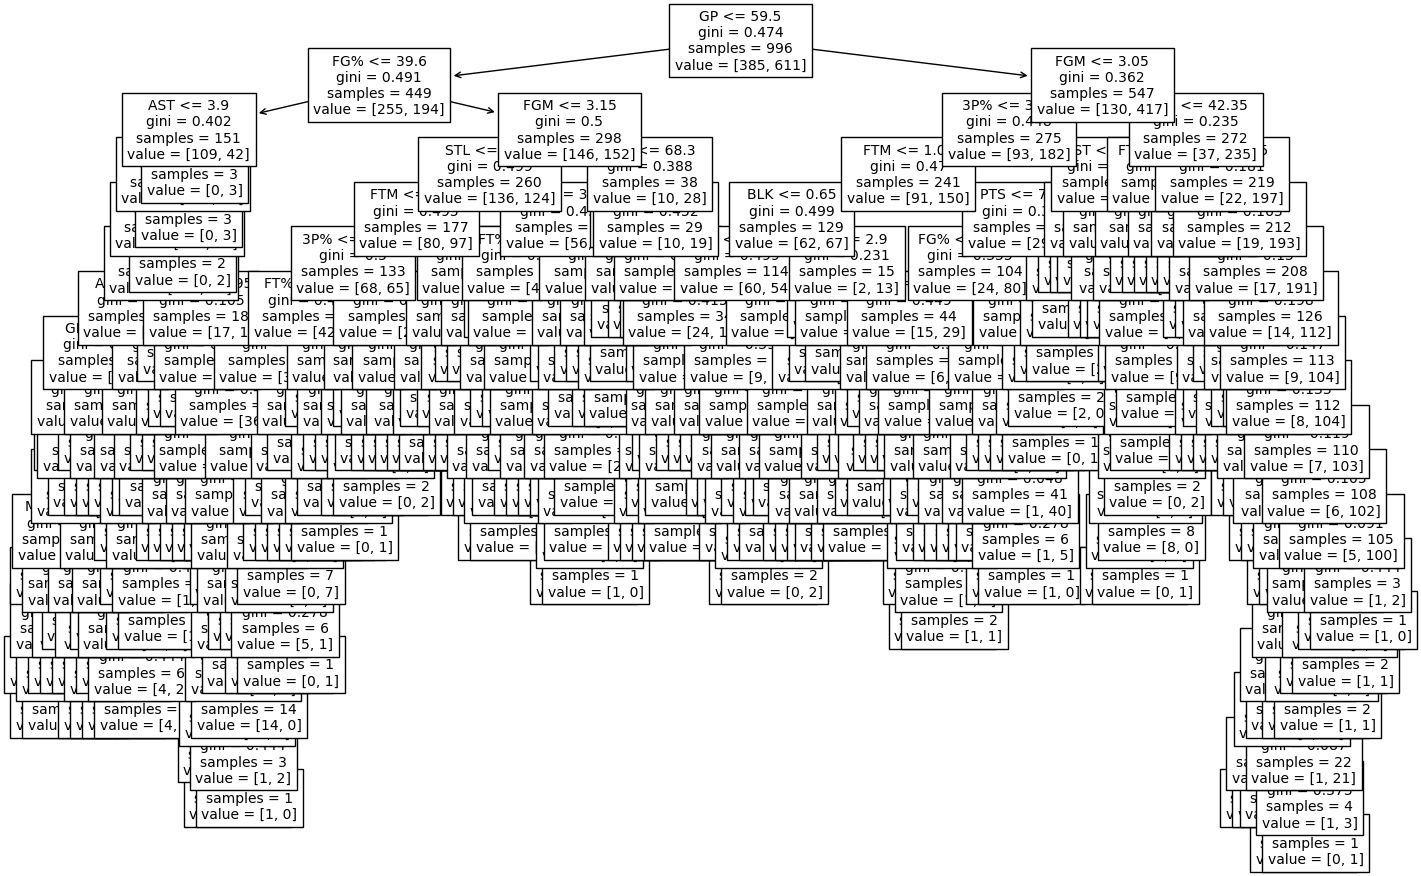

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Question 2.6: Donnez un exemple de lecture d'un tel arbre.

Réponse 

#### Question 2.7: Comment peut - on améliorer la qualité du modèle? Donnez au moins 3 méthodes:

Redéfinir le problème.
Fournir davantage d'échantillons de données.
Ajouter un contexte aux données.
Utiliser des données et des caractéristiques significatives.
Validation croisée.
Optimisation des hyperparamètres.
Choisir un algorithme différent.

#### Exercice 2.7: Essayer d'appliquer une de ces méthodes

#### Question 2.8: Concluez

50% des joueurs passeront plus de 5 ans dans la ligue